# Análise de dados espaciais com o Python
Utilizaremos:
- Geopandas
- netCDF4
- xarray
- rasterio

Aprenderemos a abrir arquivos tipo shapefile, recortar pontos, criar geometrias, abrir rasters e arquivos netCDF.


## Introdução ao geopandas
O geopandas funciona como o pandas, mas com funcionalidades adicionais que lidam com geometrias.
Esse pacote possibilita plotarmos no espaço, abrir arquivos tipo shapefile e recortar pontos, etc


In [1]:
import geopandas as gpd

In [2]:
#Leremos um arquivo shapefile utilizando o geopandas

#Caminho para o arquivo que queremos ler
pathShapefile = r"C:\Users\DaphneCalazans\OneDrive - altageotecnia.com\Área de Trabalho\Daphne\Pessoal\Mestrado\Python_EA\ENS410064-\2024\dados\SC_subdistritos_CD2022\SC_subdistritos_CD2022.shp"

#Abro o arquivo com o geopandas
geoData = gpd.read_file(pathShapefile)

#Mostrar as primeiras linhas
geoData.head()

,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,CD_RGINT,NM_RGINT,CD_RGI,NM_RGI,CD_CONCURB,NM_CONCURB,SIGLA,geometry
0,4,Sul,42,Santa Catarina,4200051,Abdon Batista,420005105,Abdon Batista,42000510500,None,4204,Chapecó,420008,Joaçaba - Herval d'Oeste,None,None,SC,"POLYGON ((-51.04368 -27.64094, -51.04398 -27.6..."
1,4,Sul,42,Santa Catarina,4200101,Abelardo Luz,420010105,Abelardo Luz,42001010500,None,4204,Chapecó,420011,Xanxerê,None,None,SC,"POLYGON ((-52.12152 -26.68147, -52.12169 -26.6..."
2,4,Sul,42,Santa Catarina,4200200,Agrolândia,420020005,Agrolândia,42002000500,None,4207,Blumenau,420022,Rio do Sul,None,None,SC,"POLYGON ((-49.83981 -27.52449, -49.83982 -27.5..."
3,4,Sul,42,Santa Catarina,4200309,Agronômica,420030905,Agronômica,42003090500,None,4207,Blumenau,420022,Rio do Sul,None,None,SC,"POLYGON ((-49.68847 -27.31815, -49.68822 -27.3..."
4,4,Sul,42,Santa Catarina,4200408,Água Doce,420040805,Água Doce,42004080500,None,4204,Chapecó,420008,Joaçaba - Herval d'Oeste,None,None,SC,"POLYGON ((-51.53125 -27.05144, -51.53139 -27.0..."


<Axes: >

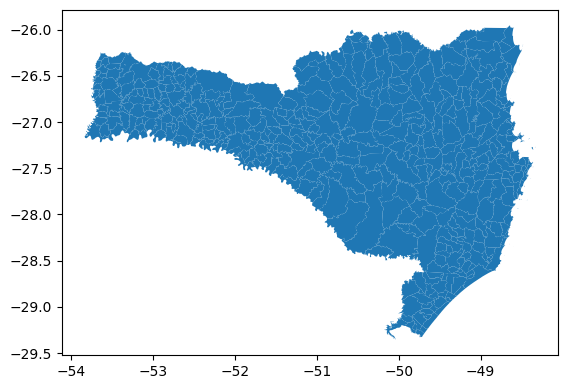

In [3]:
# Plotando o arquivo do geopandas - utilizando o matplotlib

geoData.plot()

<Axes: >

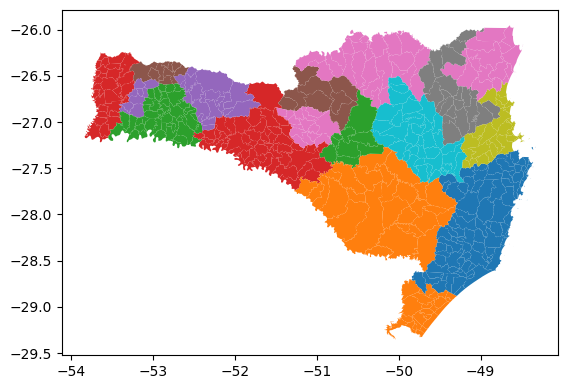

In [4]:
# Plotando com estilo - usar uma coluna do geoData para colorir o mapa

geoData.plot(column='CD_RGI')


<Axes: >

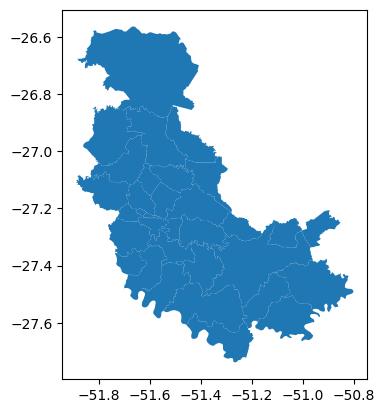

In [5]:
# Selecionar uma região de interesse

cod ='420008'

#Plotando a região selecionada
geoData[geoData['CD_RGI']==cod].plot()


## Abrindo arquivos com foco de queimadas no mundo
#https://www2.acom.ucar.edu/modeling/finn-fire-inventory-ncar
import sys, os
from urllib.request import build_opener

opener = build_opener()

filelist = [
  'https://data.rda.ucar.edu/d312009/2003_eachfire_modis/FINNv2.5_mod_GEOSCHEM_2003_c20211213.txt.gz'
]

for file in filelist:
    ofile = os.path.basename(file)
    sys.stdout.write("downloading " + ofile + " ... ")
    sys.stdout.flush()
    infile = opener.open(file)
    outfile = open(ofile, "wb")
    outfile.write(infile.read())
    outfile.close()
    sys.stdout.write("done\n")

In [6]:
# Enquanto isso ...

#Criando um dataframe cm pontos e transformando em geodataframe
import pandas as pd
dataSample = pd.DataFrame({'lon':[-48],'lat':[-27], 'fire':[10]})
dataSample.head()

#Conversão para geodataframe
gdf=gpd.GeoDataFrame(dataSample, geometry=gpd.points_from_xy(dataSample.lon,dataSample.lat,crs="EPSG:4326"))
gdf.head()

,lon,lat,fire,geometry
0,-48,-27,10,POINT (-48 -27)


In [7]:
#Plotando o ponto no espaço
#Precisamos instalar os pacotes branca e folium - pip install branca folium e mapclassify
#gdf.explore()


In [8]:
#Abrindo arquivo do Finn - queimadas e emissões no mundo do dia 08/07/2024
pathFinn=r"C:\Users\DaphneCalazans\OneDrive - altageotecnia.com\Área de Trabalho\Daphne\Pessoal\Mestrado\Python_EA\ENS410064-\2024\dados\FINNv2.5.1_modvrs_nrt_GEOSCHEM_20240708.txt\FINNv2.5.1_modvrs_nrt_GEOSCHEM_20240708.txt"

#Abrindo arquivo
finn=pd.read_csv(pathFinn)
print('Esse é o número de queimadas nessa data: '+str(finn.shape[0]))
finn.head()

Esse é o número de queimadas nessa data: 77396


,DAY,POLYID,FIREID,GENVEG,LATI,LONGI,AREA,BMASS,CO2,CO,...,C3H8,CH2O,GLYC,GLYX,HAC,MEK,MGLY,PRPE,TOLU,XYLE
0,190,1,1,2,68.983,143.080,666800.0,2.784,70930000.0,4443000.0,...,16580.0,111900.0,3684.0,0.0,0.0,55710.0,38680.0,75050.0,52950.0,1381.0
1,190,1,2,2,68.998,143.064,538300.0,2.784,57260000.0,3587000.0,...,13380.0,90330.0,2974.0,0.0,0.0,44980.0,31220.0,60590.0,42750.0,1115.0
2,190,1,3,2,68.997,143.082,455400.0,2.784,48440000.0,3034000.0,...,11320.0,76410.0,2516.0,0.0,0.0,38050.0,26410.0,51250.0,36160.0,943.3
3,190,1,4,2,68.999,143.040,424900.0,2.784,45200000.0,2831000.0,...,10560.0,71300.0,2347.0,0.0,0.0,35500.0,24650.0,47820.0,33740.0,880.2
4,190,2,5,2,68.879,140.521,433500.0,2.784,46110000.0,2888000.0,...,10770.0,72730.0,2394.0,0.0,0.0,36220.0,25140.0,48790.0,34420.0,897.9


In [9]:
#Transformar dataframe do Finn em geodataframe
#Conversão para geodataframe
gdf=gpd.GeoDataFrame(finn, geometry=gpd.points_from_xy(finn.LONGI,finn.LATI,crs="EPSG:4326"))
gdf.head()

,DAY,POLYID,FIREID,GENVEG,LATI,LONGI,AREA,BMASS,CO2,CO,...,CH2O,GLYC,GLYX,HAC,MEK,MGLY,PRPE,TOLU,XYLE,geometry
0,190,1,1,2,68.983,143.080,666800.0,2.784,70930000.0,4443000.0,...,111900.0,3684.0,0.0,0.0,55710.0,38680.0,75050.0,52950.0,1381.0,POINT (143.08 68.983)
1,190,1,2,2,68.998,143.064,538300.0,2.784,57260000.0,3587000.0,...,90330.0,2974.0,0.0,0.0,44980.0,31220.0,60590.0,42750.0,1115.0,POINT (143.064 68.998)
2,190,1,3,2,68.997,143.082,455400.0,2.784,48440000.0,3034000.0,...,76410.0,2516.0,0.0,0.0,38050.0,26410.0,51250.0,36160.0,943.3,POINT (143.082 68.997)
3,190,1,4,2,68.999,143.040,424900.0,2.784,45200000.0,2831000.0,...,71300.0,2347.0,0.0,0.0,35500.0,24650.0,47820.0,33740.0,880.2,POINT (143.04 68.999)
4,190,2,5,2,68.879,140.521,433500.0,2.784,46110000.0,2888000.0,...,72730.0,2394.0,0.0,0.0,36220.0,25140.0,48790.0,34420.0,897.9,POINT (140.521 68.879)


In [10]:
#gdf.explore()

<Axes: >

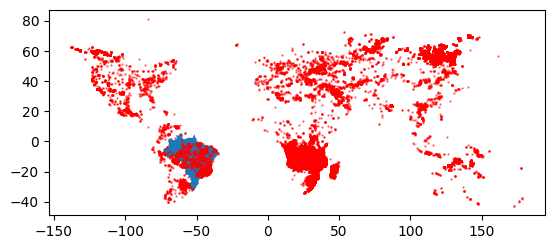

In [11]:
#Verificando focos de valor no mundo e no Brasil

#Abrindo shape do brasil
shapeBR=gpd.read_file(r"C:\Users\DaphneCalazans\OneDrive - altageotecnia.com\Área de Trabalho\Daphne\Pessoal\Mestrado\Python_EA\ENS410064-\2024\dados\BR_Pais_2022\BR_Pais_2022.shp")
import matplotlib.pyplot as plt

fig, ax=plt.subplots()
shapeBR.plot(ax=ax)
gdf.plot(ax=ax,color='red',alpha=0.5,markersize=0.5)

<Axes: >

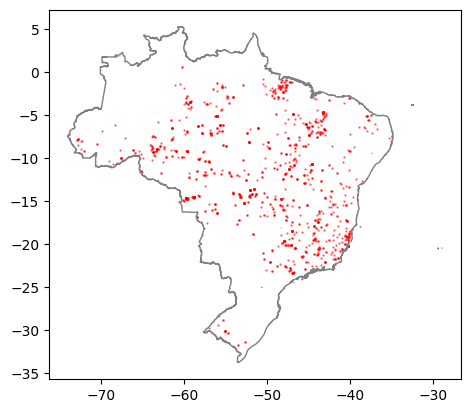

In [12]:
#Recortando dados dentro do Brasil
finnBR=gdf.clip(shapeBR.to_crs('EPSG:4326'))
fig, ax=plt.subplots()
shapeBR.boundary.plot(ax=ax, color = 'grey', linewidth = 1)
finnBR.plot(ax=ax,color='red',alpha=0.5,markersize=0.5)

In [13]:
# Cortando pontos por estado
shapeUF = gpd.read_file(r"C:\Users\DaphneCalazans\OneDrive - altageotecnia.com\Área de Trabalho\Daphne\Pessoal\Mestrado\Python_EA\ENS410064-\2024\dados\BR_RG_Intermediarias_2022\BR_RG_Intermediarias_2022.shp")
shapeUF.to_crs('EPSG:4326')
fireInUF=[]
for uf in range (0,shapeUF.shape[0]):
    print(shapeUF.iloc[uf,:])
    finnUF=finnBR.clip(shapeUF.geometry[uf])
    fireInUF.append(finnUF)

CD_RGINT                                                 1101
NM_RGINT                                          Porto Velho
SIGLA_UF                                                   RO
AREA_KM2                                           125058.017
geometry    POLYGON ((-61.954417771 -9.94967983199996, -61...
Name: 0, dtype: object
CD_RGINT                                                 1102
NM_RGINT                                            Ji-Paraná
SIGLA_UF                                                   RO
AREA_KM2                                           112696.154
geometry    POLYGON ((-60.918983882 -13.5483260399999, -60...
Name: 1, dtype: object
CD_RGINT                                                 1201
NM_RGINT                                           Rio Branco
SIGLA_UF                                                   AC
AREA_KM2                                            78721.076
geometry    POLYGON ((-67.976837448 -9.35273191299996, -67...
Name: 2, dtype: object
C

In [14]:
#Quantificando focos por estado
dfUF=pd.DataFrame()
dfUF['UF']=shapeUF.NM_UF
dfUF['fireCount']=0
for ii,fire in enumerate(fireInUF):
    print(shapeUF.NM_UF[ii]+' '+str(fire.shape[0]))
    dfUF['fireCount'][ii]=fire.shape[0]
dfUF.head()

#aqui parei de prestar atenção pegar no github depois


AttributeError: 'GeoDataFrame' object has no attribute 'NM_UF'

In [16]:
import rasterio

In [17]:
#Abrindo arquivo do SRTM usando o rasterio
dataset = rasterio.open(r"C:\Users\DaphneCalazans\OneDrive - altageotecnia.com\Área de Trabalho\Daphne\Pessoal\Mestrado\Python_EA\ENS410064-\2024\dados\EZ_AERMOD_daphne.calazans_2024-11-14\mergedSRTM.tif")


In [20]:
#Determinando o tamanho do dataset
print(dataset.width)
print(dataset.height)
print(dataset.bounds)

3614
3371
BoundingBox(left=-49.295972222222225, bottom=-26.765694444444442, right=-48.29208333333334, top=-25.829305555555553)


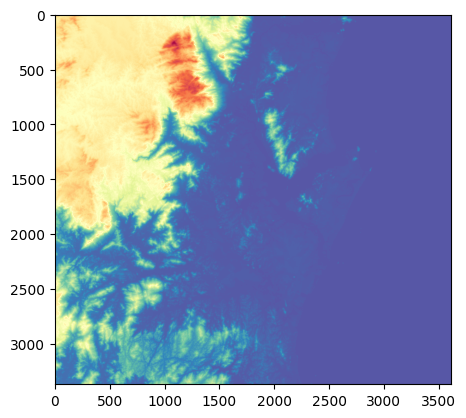

In [19]:
#plotando rasterio
fig,ax=plt.subplots()
ax.imshow(dataset.read(1),cmap='Spectral_r')

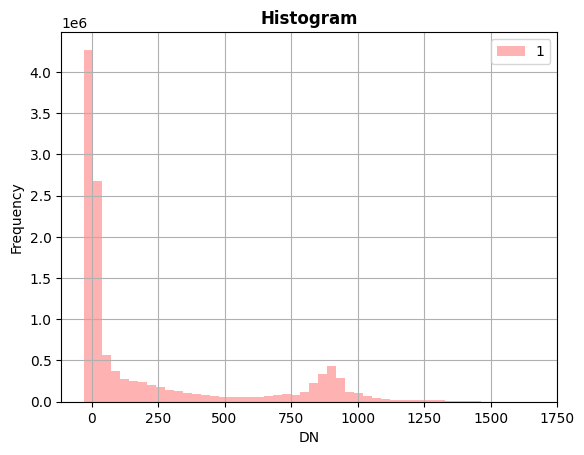

In [23]:
#Outro plto
from rasterio.plot import show_hist
show_hist(
    dataset,bins=50, lw=0.0,stacked=False,alpha=0.3,histtype='stepfilled', title='Histogram')


In [25]:
#Transformando para um array numpy
import numpy as np
arr=np.array(dataset.read(1))
arr.shape

(3371, 3614)

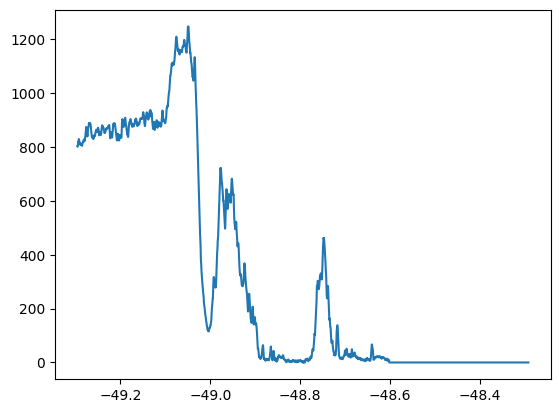

In [31]:
#Acessando matriz arr
height=dataset.shape[0]
width=dataset.shape[1]
cols, rows=np.meshgrid(np.arange(width),np.arange(height))
xs,ys=rasterio.transform.xy(dataset.transform,rows,cols)
lons=np.array(xs)
lats=np.array(ys)

xlon=xs.reshape(arr.shape)
xlon.shape
plt.plot(xlon[1000,:],arr[1000,:])